<a href="https://colab.research.google.com/github/laasyagudisa/ML_Assignments_Data/blob/main/LinearRegression_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from itertools import product




In [2]:
mydata = pd.read_csv('https://raw.githubusercontent.com/laasyagudisa/ML_Regression/main/student-mat.csv',sep=';')

In [3]:
# Clean up data by removing rows with null values and duplicates columns
mydata = mydata.dropna()

In [4]:
mydata = mydata.drop_duplicates()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


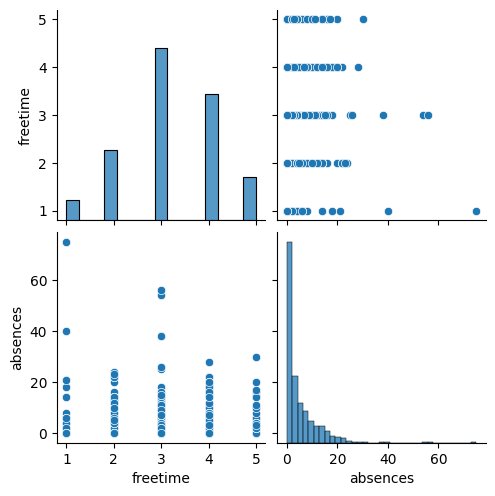

In [5]:
# Plots of the features of our dataset
sns.pairplot(mydata[['Fjob','activities','freetime','absences']], size = 2.5)
plt.show();

In [6]:
# Convert categorical values to numerical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [7]:
for column in mydata.columns:
    if mydata[column].dtype == 'object':
        mydata[column] = label_encoder.fit_transform(mydata[column])

In [8]:
# Target
Y = mydata['G3']

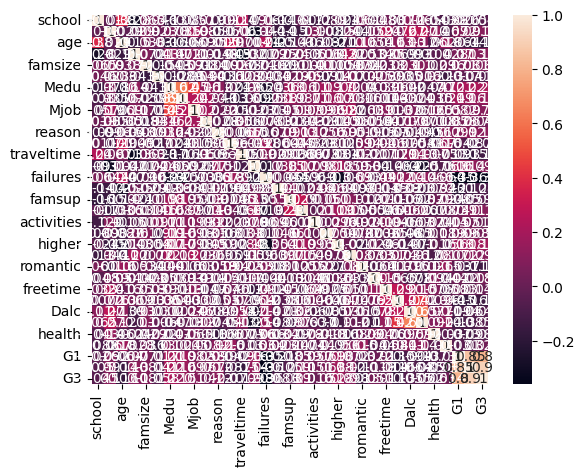

In [9]:
# Calculate the correlation matrix
corr_matrix = mydata.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [10]:
# Obtained correlation values for the target, to identify which are closely correlated to the target
interestedCorrValues = corr_matrix['G3']

In [11]:
interestedFeatures = np.logical_and(interestedCorrValues > 0, interestedCorrValues < .05)

In [12]:
# Chosen features
filtered_values = interestedCorrValues[interestedFeatures]
print(filtered_values)

Fjob          0.042286
activities    0.016100
freetime      0.011307
absences      0.034247
Name: G3, dtype: float64


In [13]:
X = mydata[['Fjob','activities','freetime','absences']]

In [14]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets (e.g., 80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
# The gradient for X (multiple attributes)
def ssr_gradient(Z, y, w):
    res = Z.dot(w[1:]) + w[0] - y
    grad = np.zeros_like(w)
    grad[0] = res.mean()
    grad[1:] = np.dot(Z.transpose(), res) / len(X)
    return grad
# Generic method to minimize ANY convex function in the world
def gradient_descent(
     gradient, Z, y, start, learn_rate=0.1, n_iter=50, tolerance=1e-06
 ):
  vector = start
  for _ in range(n_iter):
    diff = -learn_rate * np.array(gradient(Z, y, vector))
    if np.all(np.abs(diff) <= tolerance):
      break
    vector += diff
  return vector


In [16]:
# Gives the MSE and R squared.
def mse_r2(model,X,Y):
  y_pred = model[0] + np.dot(X, model[1:])
  rss = np.sum((y_pred - Y)**2)
  tss = np.sum((Y - Y.mean())**2)
  R_square = 1 - (rss/tss)
  return np.mean((y_pred - Y) ** 2), R_square


In [17]:
# Different parameters
learn_rate = [0.001,0.01,0.03]
iteration = [5000,10000]
tolerance = [1e-5,1e-6,1e-7]


#dataframe to record the trials
df = pd.DataFrame(columns=['Learning Rate', 'Tolerance', 'Iterations'])
results_df = pd.DataFrame(columns=['Learning Rate', 'Tolerance', 'Iterations','Train MSE','Train R2', 'Test MSE', 'Test R2'])

# Iterate through different parameters to find the MSE for all combinations of parameters
for lr in learn_rate:
  for tol in tolerance:
    for iter in iteration:
      modelGD = gradient_descent(
          ssr_gradient, X_train, Y_train, start=[0,0,0,0,0], learn_rate=lr,
          n_iter=iter, tolerance=tol)
      res = mse_r2(modelGD, X_train, Y_train)
      res2 = mse_r2(modelGD, X_test, Y_test)
      results_df = pd.concat([results_df, pd.DataFrame({
        'Learning Rate': [lr],
        'Tolerance': [tol],
        'Iterations': [iter],
        'Train MSE': [res[0]],
        'Train R2': [res[1]],
        'Test MSE':[res2[0]],
        'Test R2' : [res2[1]]})], ignore_index=True)

In [18]:
# Results
print(results_df)

    Learning Rate     Tolerance Iterations  Train MSE  Train R2   Test MSE  \
0           0.001  1.000000e-05       5000  23.844828 -0.135224  20.515517   
1           0.001  1.000000e-05      10000  22.749281 -0.083066  20.192758   
2           0.001  1.000000e-06       5000  23.844828 -0.135224  20.515517   
3           0.001  1.000000e-06      10000  22.749281 -0.083066  20.192758   
4           0.001  1.000000e-07       5000  23.844828 -0.135224  20.515517   
5           0.001  1.000000e-07      10000  22.749281 -0.083066  20.192758   
6           0.010  1.000000e-05       5000  20.958065  0.002211  20.765739   
7           0.010  1.000000e-05      10000  20.914577  0.004282  21.084616   
8           0.010  1.000000e-06       5000  20.958065  0.002211  20.765739   
9           0.010  1.000000e-06      10000  20.914577  0.004282  21.084616   
10          0.010  1.000000e-07       5000  20.958065  0.002211  20.765739   
11          0.010  1.000000e-07      10000  20.914577  0.004282 

In [19]:
# From the Results we get the best parameter values learning rate = 0.001, tolerance, 1e-7, n_iteration = 10000
model_train = gradient_descent(
          ssr_gradient, X_train, Y_train, start=[0,0,0,0,0], learn_rate=0.001,
          n_iter=10000, tolerance=1e-7)

In [20]:
res = mse_r2(model_train, X_test, Y_test)
print("The model performance for training set with parameters : ")
print("Learning Rate = ", 0.001)
print("Tolerance = ", 1e-7)
print("Iterations = ", 10000)
print("--------------------------------------")
print('MSE is {}'.format(res[0]))
print('R2 Score is {}'.format(res[1]))

The model performance for training set with parameters : 
Learning Rate =  0.001
Tolerance =  1e-07
Iterations =  10000
--------------------------------------
MSE is 20.1927583610485
R2 Score is 0.015229855505081824


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


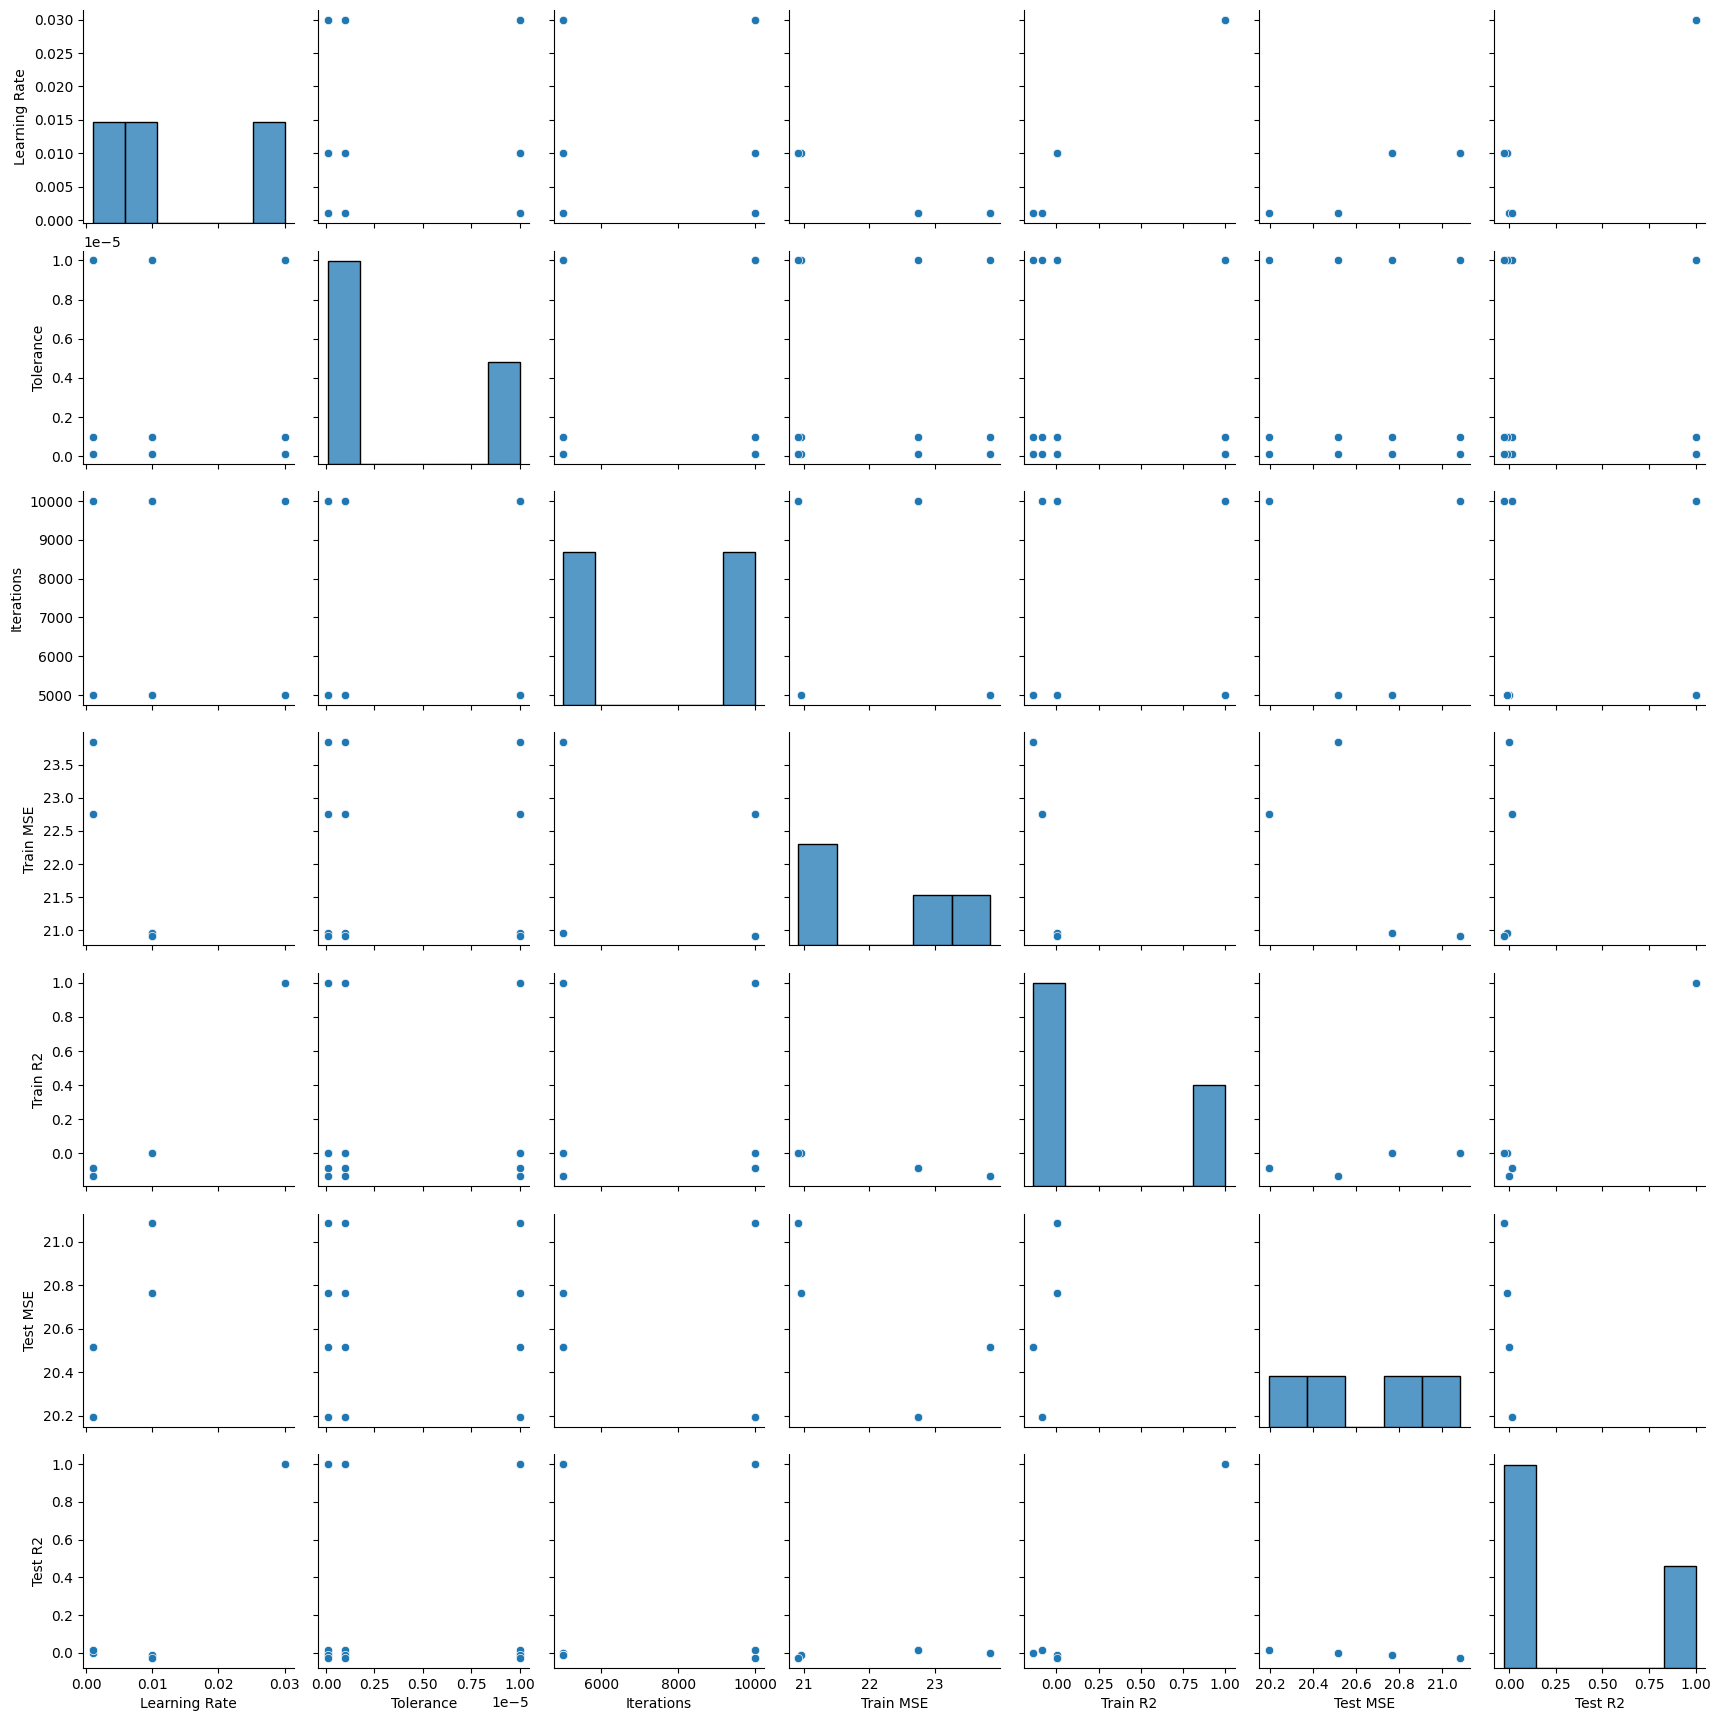

In [21]:
sns.pairplot(results_df, size = 2.5)
plt.show();

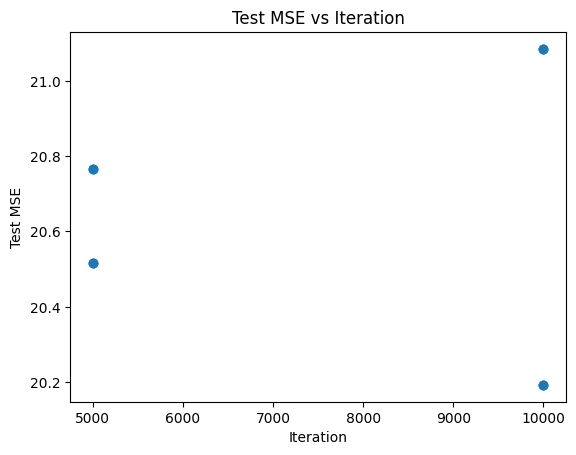

In [22]:
plt.scatter(x=results_df['Iterations'], y=results_df['Test MSE'])
plt.title("Test MSE vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("Test MSE")
plt.show()